In [1]:
from pymodulon.core import IcaData
from pymodulon import example_data
from pymodulon.io import save_to_json,load_json_model
from pymodulon.util import infer_activities
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.decomposition import PCA
from matplotlib.cm import viridis
import seaborn as sns

### Remove KOs and infer Activity matrix for current samples, to remove KO related transcriptional artefacts

In [14]:
'''
Make a list of all KOs in the three sample types: Anoxic, Qred and ESinkNull
'''

anoxic_KO_list = ['napA','napB','napC','napD','napF','napG','napH','narG','narH','narI','narZ','narY','narW',
          'dmsA','dmsB','dmsC','ynf','torC','torA','torD','torY','torZ','frdA','frdB','frdC','frdD',
          'nirB','nirC','nirD','nrfA','nrfB','nrfC','nrfD','nrfE','nrfG','norV','norW','hmp','ccp']

qred_KO_list = ['azoR','nfsA','nfsB','qorA','qorB','wrbA','yieF','kefF','kefC','kefG','kefB','nemA',
               'aegA','mdaB','ygiN','btuE','yqhD','metF','cysJ','cysI','cysH','ygc','ydi','fixA','fixB',
               'fixC','fixX']

esink_KO_list = ['poxB','ldhA','fdhF','adhE','hyc','hyp','fdoG','fdoH','fdoI','fdhE','fdhD']

all_kos = anoxic_KO_list + qred_KO_list + esink_KO_list

kos = []

for w in all_kos:
    for i in ica_data.gene_table['gene_name']:
        if(w in i):
            kos.append(i)
            
ko_bnums = [ica_data.name2num(w) for w in kos] #get the b numbers of all KOed gene symbols

### Load up an old P1k model to get the A matrix and remove any current project samples, then infer Activitiy for current samples

In [13]:
old_ica = load_json_model('models/electric_coli.json')

p1k_m = pd.read_csv('P1K/M.csv',index_col='Unnamed: 0')
p1k_a = pd.read_csv('P1K/A.csv',index_col='Unnamed: 0')
p1k_im_table = pd.read_csv('P1K/iM_table.csv')

p1k_m.columns = p1k_im_table['name']
p1k_a.index = p1k_im_table['name']

In [14]:
samples = [w for w in old_ica.X.columns if 'p1k' in w]

infer_ica = IcaData(p1k_m.loc[old_ica.X[samples].drop(index=ko_bnums).index],p1k_a[samples])
infer_ica.X = old_ica.X[samples].drop(index=ko_bnums)

In [15]:
'''
Use pymodulon to infer imodulon activities
'''

from pymodulon.util import infer_activities

samples = ['ELECOLI_HRS_AnoxicNull_HNQ_Rep1','ELECOLI_HRS_AnoxicNull_HNQ_Rep2','ELECOLI_HRS_AnoxicNull_HNQ_Rep3',
           'ELECOLI_HRS_AnoxicNull_DMSO_Rep1','ELECOLI_HRS_AnoxicNull_DMSO_Rep2','ELECOLI_HRS_AnoxicNull_DMSO_Rep3',
           'ELECOLI_HRS_QRedNull_HNQ_Rep1','ELECOLI_HRS_QRedNull_HNQ_Rep2','ELECOLI_HRS_QRedNull_HNQ_Rep3',
           'ELECOLI_HRS_QRedNull_DMSO_Rep1','ELECOLI_HRS_QRedNull_DMSO_Rep2','ELECOLI_HRS_QRedNull_DMSO_Rep3',
           'ELECOLI_HRS_ESinkNull_HNQ_Rep1','ELECOLI_HRS_ESinkNull_HNQ_Rep2','ELECOLI_HRS_ESinkNull_HNQ_Rep3',
           'ELECOLI_HRS_ESinkNull_DMSO_Rep1','ELECOLI_HRS_ESinkNull_DMSO_Rep2','ELECOLI_HRS_ESinkNull_DMSO_Rep3']

activities = infer_activities(infer_ica,ica_data.X[samples])

/usr/local/lib/python3.8/dist-packages/pymodulon/util.py:327: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead.
  shared_genes = ica_data.M.index & data.index


In [16]:
activities

,ELECOLI_HRS_AnoxicNull_HNQ_Rep1,ELECOLI_HRS_AnoxicNull_HNQ_Rep2,ELECOLI_HRS_AnoxicNull_HNQ_Rep3,ELECOLI_HRS_AnoxicNull_DMSO_Rep1,ELECOLI_HRS_AnoxicNull_DMSO_Rep2,ELECOLI_HRS_AnoxicNull_DMSO_Rep3,ELECOLI_HRS_QRedNull_HNQ_Rep1,ELECOLI_HRS_QRedNull_HNQ_Rep2,ELECOLI_HRS_QRedNull_HNQ_Rep3,ELECOLI_HRS_QRedNull_DMSO_Rep1,ELECOLI_HRS_QRedNull_DMSO_Rep2,ELECOLI_HRS_QRedNull_DMSO_Rep3,ELECOLI_HRS_ESinkNull_HNQ_Rep1,ELECOLI_HRS_ESinkNull_HNQ_Rep2,ELECOLI_HRS_ESinkNull_HNQ_Rep3,ELECOLI_HRS_ESinkNull_DMSO_Rep1,ELECOLI_HRS_ESinkNull_DMSO_Rep2,ELECOLI_HRS_ESinkNull_DMSO_Rep3
Sugar Diacid,1.950491,2.687946,2.634121,2.160259,2.943780,2.444939,2.281619,2.936343,2.582408,3.041164,2.606995,2.287975,3.901253,3.125245,1.820721,3.323275,3.140257,3.284046
Translation,-3.447003,-2.679019,-1.106907,-1.737373,-3.883543,-2.726387,0.693538,0.166653,1.256065,-1.577898,-1.349026,-2.405776,-7.504673,-7.482196,-6.661319,-11.352607,-9.527590,-9.260986
ygdT,-0.686472,0.250043,-2.623634,-3.225851,-2.853562,-2.649920,-2.179018,-2.821288,-2.250053,-3.036915,-2.580780,-2.210417,1.579445,-0.003593,-2.425615,-1.043239,-1.582162,1.887198
OxyR,-1.108041,-1.556229,-0.494537,-1.715748,-1.705628,-1.534243,-0.739317,-1.837443,-1.427052,-0.267623,-0.374785,-0.940513,-0.511288,-1.124541,-0.133693,-0.565009,-0.875288,-0.772642
FlhDC-2,-0.660292,0.238043,1.333291,1.638776,0.701272,1.877356,-0.464964,-0.782828,-1.700685,-2.256563,-0.965577,-1.596556,-10.546285,-8.790855,-11.422766,-8.874406,-10.706327,-9.839099
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Glyoxylate,-7.752459,-6.519761,-6.260437,-5.984644,-7.683089,-6.451818,-7.402105,-7.540870,-5.940950,-6.571473,-7.123435,-6.783582,-8.110095,-9.187523,-10.319214,-8.015973,-9.325874,-8.521964
CCK-PGI Del,3.136295,2.589582,3.093147,2.695682,2.354348,2.729098,2.254722,1.471058,3.437589,2.017597,2.901047,2.056190,0.312213,0.817965,0.141714,1.306681,0.316727,1.149978
Acetate,-8.957104,-8.206906,-7.388017,-7.562087,-9.922627,-7.428166,-9.141847,-10.709240,-9.125679,-9.097638,-8.483626,-7.946817,-5.657781,-8.419471,-8.908050,-8.015059,-7.488652,-6.842444
Ile/Val,-11.470318,-10.625661,-6.894938,-6.534558,-11.133198,-5.871431,-7.410992,-9.052764,-8.383664,-6.371421,-6.834710,-6.758782,-13.382929,-13.423411,-13.320542,-11.799275,-11.679578,-12.546462


### PCA biplot with KO's removed and inferred Activities 

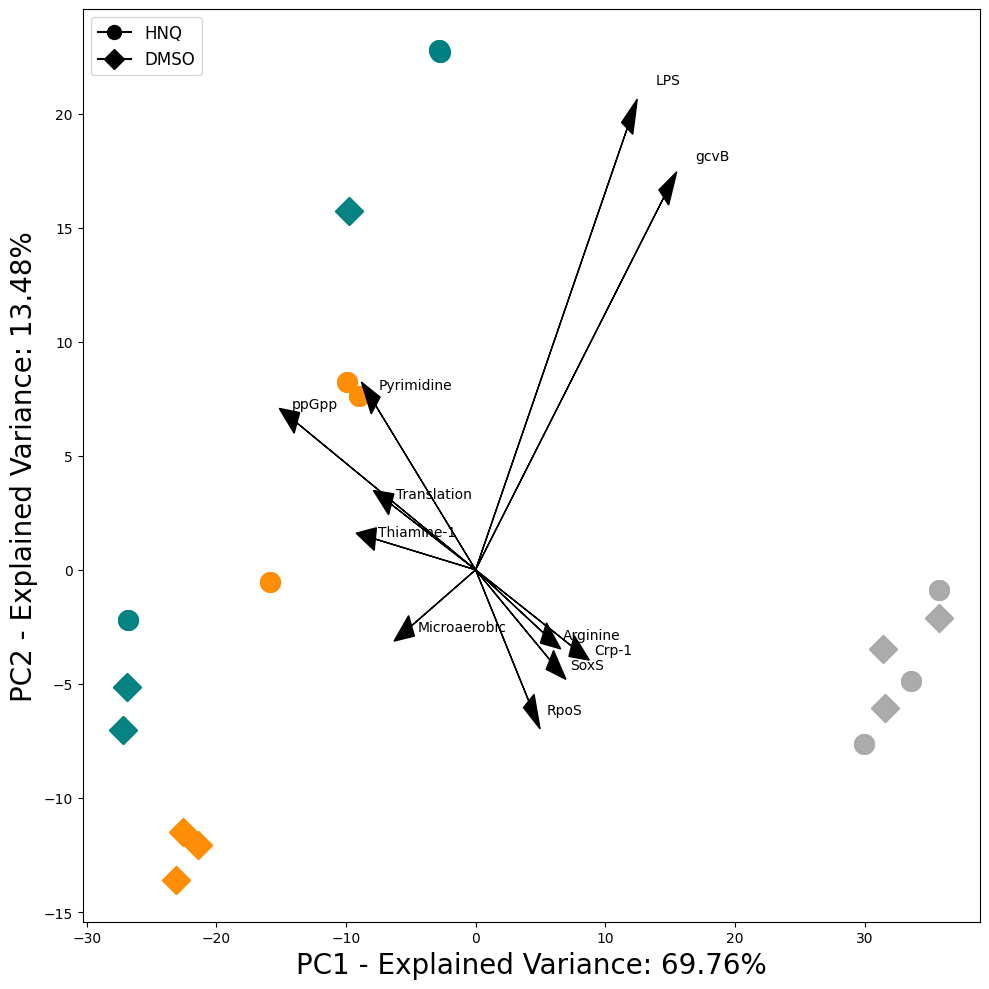

In [17]:
'''
The samples list define all sample names for which PCA is done, the labels plot labels the sample type for 
the scatter plot
'''

import itertools
import matplotlib.patches as mpatches
import matplotlib.lines as mlines


labels = ['Anoxic_HNQ','Anoxic_HNQ','Anoxic_HNQ','Anoxic_DMSO','Anoxic_DMSO','Anoxic_DMSO',
          'QRed_HNQ','QRed_HNQ','QRed_HNQ','QRed_DMSO','QRed_DMSO','QRed_DMSO',
          'ESink_HNQ','ESink_HNQ','ESink_HNQ','ESink_DMSO','ESink_DMSO','ESink_DMSO']

# Perform PCA
pca = PCA(n_components=3)
principal_components = pca.fit_transform(activities[samples].T)

# Create a new DataFrame with the principal components
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3'])

# Concatenate the labels with the principal components
df_pca['Labels'] = labels

# Set up the scatter plots
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

 
# Define color and marker mappings
color_map = {'Anoxic': 'teal', 'QRed': 'darkorange', 'ESink': 'darkgrey'}
marker_map = {'HNQ': 'o', 'DMSO': 'D'}

# Plot each label with a different color and marker
for label, marker_color in zip(labels, itertools.cycle(color_map.values())):
    sample_type, condition = label.split('_')
    marker = marker_map.get(condition)
    color = color_map.get(sample_type)
    
    # Extract data for current label
    label_df = df_pca[df_pca['Labels'] == label]
    
    ax.scatter(label_df.iloc[:, 0], label_df.iloc[:, 1], label=label, alpha=0.7, s=200, c=color,marker=marker)
  


ax.set_xlabel(f'PC{1} - Explained Variance: {pca.explained_variance_ratio_[0]:.2%}',fontsize=20)
ax.set_ylabel(f'PC{2} - Explained Variance: {pca.explained_variance_ratio_[1]:.2%}',fontsize=20)
ax.legend()



##Add in arrows for biplot
loadings = pd.DataFrame(index=activities.index)
loadings['PC1'] = pca.components_[0, :]
loadings['PC2'] = pca.components_[1, :]

arrows_to_make = ['gcvB','ppGpp','Crp-1','Translation','Thiamine-1','RpoS','SoxS','Microaerobic','Pyrimidine','Arginine','LPS']#['FHL','ppGpp','gcvB','ArcA','Microaerobic','SoxS','pts ALE']

# arrow length variable extends arrows to help in interpreting the plot
# text_scale determines how far text labels are from arrow tips (1 = on top of them)
arrow_length = 50
text_scale = 1.1

# the place the arrows start is up to you, so you can move it out of the way
start1 = 0
start2 = 0

# loop through each gene and add its arrow
for g in arrows_to_make:
    # directions in PC1 and 2
    g_weight_pc1 = loadings.loc[g, 'PC1']
    g_weight_pc2 = loadings.loc[g, 'PC2']
    
    # lengthen arrow by a constant factor
    g_weight_pc1 = g_weight_pc1 * arrow_length
    g_weight_pc2 = g_weight_pc2 * arrow_length
    
    # add the arrow
    ax.arrow(start1, start2, g_weight_pc1, g_weight_pc2, head_width = 1,color='black')

    ax.text(start1 + (text_scale * g_weight_pc1)+1,
            start2 + (text_scale * g_weight_pc2), 
            g,size=10)
    
    
legend_handles = []

# HNQ Legend

legend_handles.append((mpatches.Patch(color='black', label='Anoxic'), mlines.Line2D([], [], color='black', marker='o', markersize=10, label='HNQ')))
legend_handles.append((mpatches.Patch(color='black', label='QRed'), mlines.Line2D([], [], color='black', marker='D', markersize=10, label='DMSO')))

plt.legend(handles=[handle[1] for handle in legend_handles], loc='upper left',fontsize=12)

# Show the plots
plt.tight_layout()
#plt.savefig('Biplots/Revised_Fig5.pdf',dpi=600)

In [18]:
loadings['PC1'] = loadings['PC1']*50
loadings['PC2'] = loadings['PC2']*50

loadings.to_csv('Biplots/Revised_Fig5_arrow_positions_final.csv')
df_pca.to_csv('Biplots/Revised_Fig5_scatter.csv')

In [33]:
scatter_data = pd.DataFrame()
scatter_data['anoxic_hnq']=ica_data.X[samples].iloc[:,0:3].mean(axis=1)
scatter_data['anoxic_dmso']=ica_data.X[samples].iloc[:,3:6].mean(axis=1)
scatter_data['qred_hnq']=ica_data.X[samples].iloc[:,6:9].mean(axis=1)
scatter_data['qred_dmso']=ica_data.X[samples].iloc[:,9:12].mean(axis=1)
scatter_data['esink_hnq']=ica_data.X[samples].iloc[:,12:15].mean(axis=1)
scatter_data['esink_dmso']=ica_data.X[samples].iloc[:,15:].mean(axis=1)

### tpm scatter plot for LPS/gcvB since they show up as important imodulons

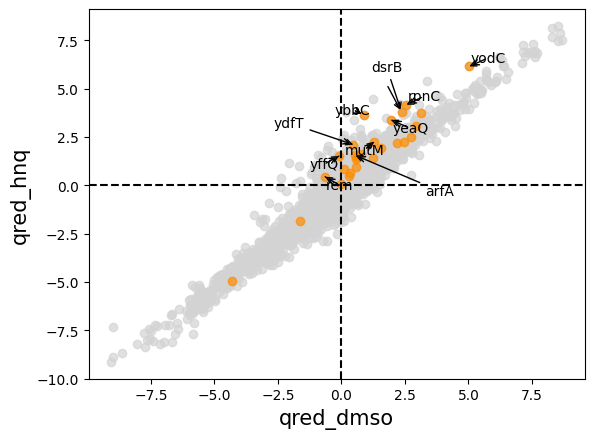

In [34]:
import numpy as np
from adjustText import adjust_text  # Import the adjust_text function

highlight_genes = pd.read_csv('53_gene_table.csv')['locus']#old_ica.view_imodulon('UC-1').index

sample_1 = 'qred_dmso'
sample_2 = 'qred_hnq'

# Scatter plot
plt.scatter(scatter_data[sample_1], scatter_data[sample_2], c='lightgrey', alpha=0.7, marker='o')
plt.scatter(scatter_data[sample_1].loc[highlight_genes], scatter_data[sample_2].loc[highlight_genes], c='darkorange', alpha=0.7, marker='o')

# Add x=0 and y=0 lines
plt.axvline(x=0, color='black', linestyle='--')
plt.axhline(y=0, color='black', linestyle='--')

# Calculate distances from x=y line
distances = abs(scatter_data[sample_1].loc[highlight_genes] - scatter_data[sample_2].loc[highlight_genes])

# Get indices of 10 points furthest from x=y line
furthest_indices = distances.nlargest(10).index

# Annotate furthest points with their IDs
texts = []  # List to hold text annotations
for idx in furthest_indices:
    x = scatter_data[sample_1][idx]
    y = scatter_data[sample_2][idx]
    
    
    # Annotate and store text annotations
    text = plt.annotate(ica_data.num2name(idx), (x, y), ha='center', fontsize=10,
                        arrowprops=dict(arrowstyle="->", color='black'))
    texts.append(text)

# Adjust overlapping labels
adjust_text(texts, arrowprops=dict(arrowstyle="->", color='black'))

plt.xlabel(sample_1, fontsize=15)
plt.ylabel(sample_2, fontsize=15)


scatter_data.index = [ica_data.num2name(w) for w in scatter_data.index]

#scatter_data.to_csv('Transcripts/UC1_all_scatter.csv')
scatter_data.loc[[ica_data.num2name(w) for w in furthest_indices]].to_csv('Transcripts/UC1_QRedNull_highlighted_scatter.csv')

plt.show()


### iM activity heatmap/aggregated plot for imodulons weighted in the PCA biplot

In [23]:
samples = ['ELECOLI_HRS_AnoxicNull_HNQ_Rep1','ELECOLI_HRS_AnoxicNull_HNQ_Rep2','ELECOLI_HRS_AnoxicNull_HNQ_Rep3',
           'ELECOLI_HRS_AnoxicNull_DMSO_Rep1','ELECOLI_HRS_AnoxicNull_DMSO_Rep2','ELECOLI_HRS_AnoxicNull_DMSO_Rep3',
           'ELECOLI_HRS_QRedNull_HNQ_Rep1','ELECOLI_HRS_QRedNull_HNQ_Rep2','ELECOLI_HRS_QRedNull_HNQ_Rep3',
           'ELECOLI_HRS_QRedNull_DMSO_Rep1','ELECOLI_HRS_QRedNull_DMSO_Rep2','ELECOLI_HRS_QRedNull_DMSO_Rep3',
           'ELECOLI_HRS_ESinkNull_HNQ_Rep1','ELECOLI_HRS_ESinkNull_HNQ_Rep2','ELECOLI_HRS_ESinkNull_HNQ_Rep3',
           'ELECOLI_HRS_ESinkNull_DMSO_Rep1','ELECOLI_HRS_ESinkNull_DMSO_Rep2','ELECOLI_HRS_ESinkNull_DMSO_Rep3']

labels = ['Anoxic_HNQ','Anoxic_HNQ','Anoxic_HNQ','Anoxic_DMSO','Anoxic_DMSO','Anoxic_DMSO',
          'QRed_HNQ','QRed_HNQ','QRed_HNQ','QRed_DMSO','QRed_DMSO','QRed_DMSO',
          'ESink_HNQ','ESink_HNQ','ESink_HNQ','ESink_DMSO','ESink_DMSO','ESink_DMSO']
# samples = [w for w in samples if 'HNQ' in w]
# labels = [w for w in labels if 'HNQ' in w]

In [24]:
activities

,ELECOLI_HRS_AnoxicNull_HNQ_Rep1,ELECOLI_HRS_AnoxicNull_HNQ_Rep2,ELECOLI_HRS_AnoxicNull_HNQ_Rep3,ELECOLI_HRS_AnoxicNull_DMSO_Rep1,ELECOLI_HRS_AnoxicNull_DMSO_Rep2,ELECOLI_HRS_AnoxicNull_DMSO_Rep3,ELECOLI_HRS_QRedNull_HNQ_Rep1,ELECOLI_HRS_QRedNull_HNQ_Rep2,ELECOLI_HRS_QRedNull_HNQ_Rep3,ELECOLI_HRS_QRedNull_DMSO_Rep1,ELECOLI_HRS_QRedNull_DMSO_Rep2,ELECOLI_HRS_QRedNull_DMSO_Rep3,ELECOLI_HRS_ESinkNull_HNQ_Rep1,ELECOLI_HRS_ESinkNull_HNQ_Rep2,ELECOLI_HRS_ESinkNull_HNQ_Rep3,ELECOLI_HRS_ESinkNull_DMSO_Rep1,ELECOLI_HRS_ESinkNull_DMSO_Rep2,ELECOLI_HRS_ESinkNull_DMSO_Rep3
Sugar Diacid,1.950491,2.687946,2.634121,2.160259,2.943780,2.444939,2.281619,2.936343,2.582408,3.041164,2.606995,2.287975,3.901253,3.125245,1.820721,3.323275,3.140257,3.284046
Translation,-3.447003,-2.679019,-1.106907,-1.737373,-3.883543,-2.726387,0.693538,0.166653,1.256065,-1.577898,-1.349026,-2.405776,-7.504673,-7.482196,-6.661319,-11.352607,-9.527590,-9.260986
ygdT,-0.686472,0.250043,-2.623634,-3.225851,-2.853562,-2.649920,-2.179018,-2.821288,-2.250053,-3.036915,-2.580780,-2.210417,1.579445,-0.003593,-2.425615,-1.043239,-1.582162,1.887198
OxyR,-1.108041,-1.556229,-0.494537,-1.715748,-1.705628,-1.534243,-0.739317,-1.837443,-1.427052,-0.267623,-0.374785,-0.940513,-0.511288,-1.124541,-0.133693,-0.565009,-0.875288,-0.772642
FlhDC-2,-0.660292,0.238043,1.333291,1.638776,0.701272,1.877356,-0.464964,-0.782828,-1.700685,-2.256563,-0.965577,-1.596556,-10.546285,-8.790855,-11.422766,-8.874406,-10.706327,-9.839099
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Glyoxylate,-7.752459,-6.519761,-6.260437,-5.984644,-7.683089,-6.451818,-7.402105,-7.540870,-5.940950,-6.571473,-7.123435,-6.783582,-8.110095,-9.187523,-10.319214,-8.015973,-9.325874,-8.521964
CCK-PGI Del,3.136295,2.589582,3.093147,2.695682,2.354348,2.729098,2.254722,1.471058,3.437589,2.017597,2.901047,2.056190,0.312213,0.817965,0.141714,1.306681,0.316727,1.149978
Acetate,-8.957104,-8.206906,-7.388017,-7.562087,-9.922627,-7.428166,-9.141847,-10.709240,-9.125679,-9.097638,-8.483626,-7.946817,-5.657781,-8.419471,-8.908050,-8.015059,-7.488652,-6.842444
Ile/Val,-11.470318,-10.625661,-6.894938,-6.534558,-11.133198,-5.871431,-7.410992,-9.052764,-8.383664,-6.371421,-6.834710,-6.758782,-13.382929,-13.423411,-13.320542,-11.799275,-11.679578,-12.546462


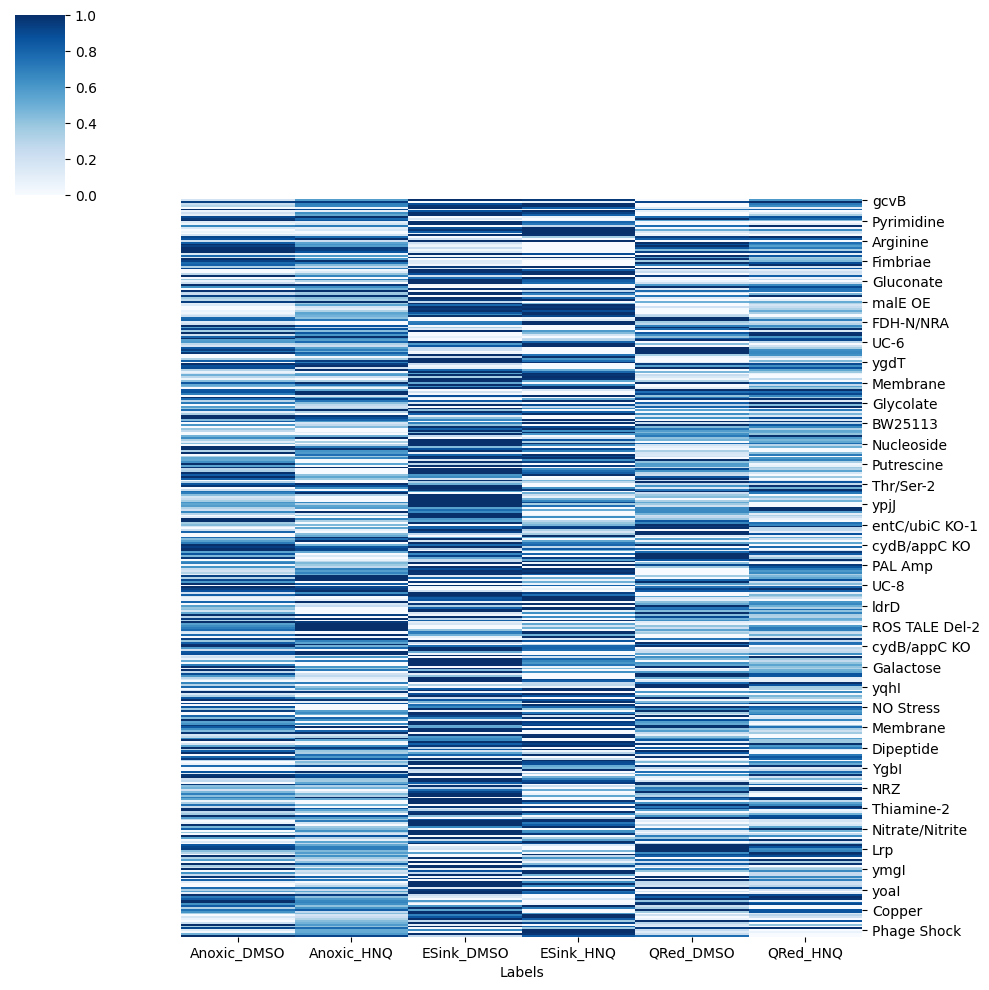

In [26]:
#PC1 separates Evolved/Unevolved samples, PC2 separates EV0 and EV1

# Get the loadings of the original features onto PC1 and PC2 and then make a heatmap of their activities
loadings_pc1 = pca.components_[0, :]
loadings_pc2 = pca.components_[1, :]

top_n = 200  
top_indices_pc1 = abs(loadings_pc1).argsort()[-top_n:][::-1]
top_indices_pc2 = abs(loadings_pc2).argsort()[-top_n:][::-1]

#pc1_top = activities[samples].loc[imodulon_list]
pc1_top = activities[samples].iloc[top_indices_pc1]
pc2_top = activities[samples].iloc[top_indices_pc2]

pc_top = pd.concat([pc1_top,pc2_top])#pc1_top#pd.concat([pc1_top,pc2_top])#pc1_top

pc_top = pc_top[samples]

df_labels = pd.DataFrame({'Labels': labels})

# Concatenate the labels DataFrame with the pc_top DataFrame
pc_top_with_labels = pd.concat([df_labels, pc_top.T], axis=1)

pc_top = pc_top.T
pc_top['Labels'] = labels


# Group by 'Labels' and calculate the mean for each group
averaged_pc_top = pc_top.groupby('Labels').mean()

# Transpose the result to have samples as columns again
averaged_pc_top = averaged_pc_top.T

def normalize_row(row):
    min_val = row.min()
    max_val = row.max()
    normalized_row = (row - min_val) / (max_val - min_val)
    return normalized_row

# Apply the normalization function to each row
normalized_averaged_pc_top = averaged_pc_top.apply(normalize_row, axis=1)

np.random.seed(42)
cmap = sns.clustermap(normalized_averaged_pc_top, cmap="Blues", row_cluster=False,col_cluster=False,figsize=(10,10))
plt.show()

### Get aggregated imodulon function weights 

In [28]:
im_table = pd.read_csv('P1K/iM_table.csv',index_col='name')
pca_imodulons = im_table.loc[pc_top.columns[:-1]]
reverse_imods = ['ppGpp','Crp-1','Cra']

for imod in reverse_imods:
    normalized_averaged_pc_top.loc[imod] = 1-normalized_averaged_pc_top.loc[imod]
    
grouped_im_df = pd.DataFrame()


for cat in pca_imodulons['category'].unique():
    grouped_im_df = pd.concat([grouped_im_df,pd.DataFrame(normalized_averaged_pc_top.loc[pca_imodulons[pca_imodulons['category']==cat].index].mean(),columns=[cat])],axis=1)

grouped_im_df#.to_csv('') 

,Amino Acid Metabolism,Global Stress,Extracellular Structures,Unknown,Envelope Stress,Cofactor Metabolism,Nucleotide Metabolism,Carbon Metabolism,Energy Metabolism,Translation,...,Phosphate Metabolism,ALE Effects,Quorum Sensing,Phage Shock,DNA Damage,Temperature Shock,Prophage,Genome Reduction,Acid Stress,Strain Difference
Labels,,,,,,,,,,,,,,,,,,,,,
Anoxic_DMSO,0.744840,0.102887,0.428552,0.477124,0.452623,0.882845,0.669259,0.554195,0.369271,0.675623,...,0.477620,0.230950,0.448015,0.114908,0.495875,0.490454,0.054810,0.777475,0.569611,0.000000
Anoxic_HNQ,0.639820,0.029011,0.543281,0.487040,0.515572,0.627527,0.405457,0.440321,0.348404,0.710170,...,0.316390,0.381595,0.535607,0.514984,0.528658,0.474835,0.000000,0.908339,0.215705,0.177394
ESink_DMSO,0.455450,0.978653,0.605882,0.662856,0.663531,0.121309,0.453739,0.645315,0.634229,0.000000,...,0.500000,1.000000,0.983822,0.652973,0.393423,0.576689,1.000000,0.000000,0.000000,0.689467
ESink_HNQ,0.332806,0.959090,0.447712,0.525920,0.476758,0.015382,0.606593,0.516530,0.649500,0.263288,...,0.453932,0.692991,0.897779,1.000000,0.390850,0.521452,0.978988,0.517868,0.264941,1.000000
QRed_DMSO,0.520279,0.316743,0.483483,0.379823,0.512596,0.984030,0.725075,0.486561,0.409922,0.769078,...,0.738469,0.000000,0.057427,0.240351,0.488385,0.500000,0.042106,0.956743,0.801541,0.211366
QRed_HNQ,0.433478,0.173366,0.602299,0.382837,0.589145,0.589647,0.666248,0.435326,0.394486,1.000000,...,0.686729,0.457783,0.299325,0.000000,0.357220,0.591121,0.279627,1.000000,1.000000,0.298396


In [29]:
#grouped_im_df.dropna(axis=1).to_csv('Heatmaps/Grouped_iMs_HNQ_Fig5_revised.csv')
#normalized_averaged_pc_top.drop_duplicates().to_csv('Heatmaps/PCA_iMs_HNQ_DMSO_Fig5_revised.csv')

### gcvB LPS imodulon phase plane to check their overall transcriptional relation

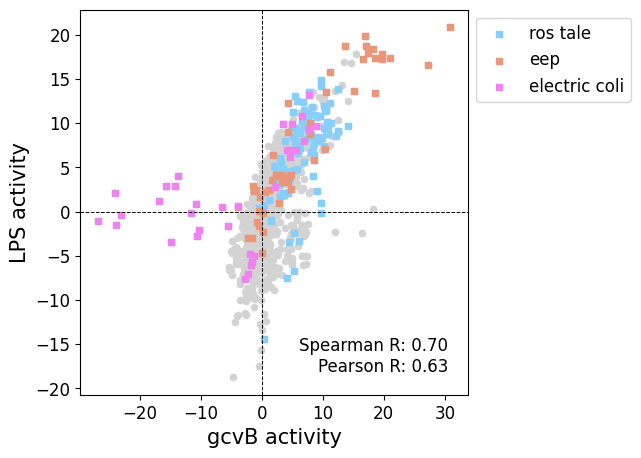

In [79]:
import scipy.stats as stats
import matplotlib

matplotlib.rcParams['pdf.fonttype']=42
matplotlib.rcParams['ps.fonttype']=42

ica_data.sample_table['project'].unique()

projects_to_highlight = ['ros_tale','eep','electric_coli']

ros = ica_data.sample_table[ica_data.sample_table['project']=='ros_tale'].index.tolist()
eep = ica_data.sample_table[ica_data.sample_table['project']=='eep'].index.tolist()
electric_coli = ica_data.sample_table[ica_data.sample_table['project']=='electric_coli'].index.tolist()

# Extract data for gcvB and LPS
gcvB = ica_data.A.loc['gcvB']
LPS = ica_data.A.loc['LPS']

# Ensure gcvB and LPS have the same indices
common_indices = gcvB.index.intersection(LPS.index)
gcvB = gcvB[common_indices]
LPS = LPS[common_indices]

# Calculate correlations
spearman_corr, _ = stats.spearmanr(gcvB, LPS)
pearson_corr, _ = stats.pearsonr(gcvB, LPS)


plt.figure(figsize=(5,5))

plt.scatter(ica_data.A.loc['gcvB'],ica_data.A.loc['LPS'],color='lightgrey',s=20)
plt.scatter(ica_data.A.loc['gcvB'][ros],ica_data.A.loc['LPS'][ros],color='lightskyblue',s=20,alpha=1,marker='s',label='ros tale')
plt.scatter(ica_data.A.loc['gcvB'][eep],ica_data.A.loc['LPS'][eep],color='darksalmon',s=20,alpha=1,marker='s',label='eep')
plt.scatter(ica_data.A.loc['gcvB'][electric_coli],ica_data.A.loc['LPS'][electric_coli],color='violet',s=20,alpha=1,marker='s',label='electric coli')

# Add x=0 and y=0 dotted lines
plt.axhline(0, color='black', linestyle='--', linewidth=0.7)
plt.axvline(0, color='black', linestyle='--', linewidth=0.7)


plt.ylabel('LPS activity',fontsize=15)
plt.xlabel('gcvB activity',fontsize=15)
plt.xticks(fontsize=12);
plt.yticks(fontsize=12);

# Add text with correlations
plt.text(0.95, 0.05, f'Spearman R: {spearman_corr:.2f}\nPearson R: {pearson_corr:.2f}',
         horizontalalignment='right', verticalalignment='bottom', transform=plt.gca().transAxes, fontsize=12)


plt.legend(fontsize=12,bbox_to_anchor=(1,1))

plt.savefig('phase_planes/gcvBvsLPS_phase_plane.pdf',dpi=600, bbox_inches='tight')

### Make a final imodulon table with metadata for the samples

In [31]:
ica_data = load_json_model('electric_coli.json')

In [36]:
ims = ['Resistance','Cysteine-2','RpoS','Cellulose','SoxS','nquinone ALE 3','LPS','gcvB','Pyrimidine','ppGpp','Translation',
      'Thiamine-1','Microaerobic','SoxS','Crp-1','Arginine','ArcA','FHL','Fur-2','Thr/Ser-1','UC-8']

cols = ['name','regulator_readable','function','category','n_genes','exp_var']
gene_list = []
table = ica_data.imodulon_table.loc[ims]


for im in ims:
    bnums = abs(ica_data.view_imodulon(im)['gene_weight']).sort_values(ascending=False).index[0:10].tolist()
    gene_list.append([ica_data.num2name(w) for w in bnums])
    
table['Significant Genes'] = gene_list
table
table[cols+['Significant Genes']].rename(columns={'regulator_readable':'regulator'}).to_csv('fig5_6_im_table.csv',index=False)

In [34]:
table[cols+['Significant Genes']].rename(columns={'regulator_readable':'regulator'})

,name,regulator,function,category,n_genes,exp_var,Significant Genes
Resistance,Resistance,NaN,Multidrug resistance; stress response to harmf...,Envelope Stress,58,0.004146,"[sgrT, acrZ, yciY, ecnB, rmf, mntS, lpp, blr, ..."
Cysteine-2,Cysteine-2,CysB,"Cysteine biosynthesis, sulfate assimilation",Amino Acid Metabolism,9,0.000964,"[cysH, cysP, cysI, cysA, gsiD, cysC, cysU, gsi..."
RpoS,RpoS,RpoS,Master regulator of global stress response,Global Stress,122,0.039128,"[yiaG, ycaC, ygaM, katE, yahO, ecnB, blc, poxB..."
Cellulose,Cellulose,NaN,Cellulose biosynthesis; biofilm formation; mem...,Extracellular Structures,95,0.008281,"[yagU, nlpA, yahO, zapC, yicS, iraP, yiiS, usp..."
SoxS,SoxS,SoxS,"Superoxide/nitric oxide sensing and removal, p...",Redox Stress,117,0.004168,"[soxS, fpr, fumC, ydbK, nhoA, sodA, nfo, yeiI,..."
nquinone ALE 3,nquinone ALE 3,NaN,ubiC KO and associated adaptive regulatory cha...,Energy Metabolism,26,0.001768,"[ubiC, rppH, yeiP, pdhR, ptsP, slyB, yajQ, mgs..."
LPS,LPS,NaN,Lipopolysaccharide biosynthesis and export,Extracellular Structures,43,0.005924,"[waaS, waaU, wbbK, wbbH, gnsB, waaZ, rfbX, waa..."
gcvB,gcvB,gcvB,Amino acid transport,Amino Acid Metabolism,76,0.005554,"[yrhD, yqeK, yibG, yibV, ygeG, ykfM, yjbL, yjb..."
Pyrimidine,Pyrimidine,PurR or UTP,Pyrimidine transport and biosynthesis,Nucleotide Metabolism,13,0.017879,"[pyrB, pyrI]"
ppGpp,ppGpp,ppGpp,Stringent response,Global Stress,70,0.023261,"[suhB, yidD, rnpA, potA, plaP, ydhC, dusB, yfh..."
